In [1]:
import pylab
import boolean2
from boolean2 import state, network, util, Model


text = """
#initial conditions
cmk-1 = ncr = True 
pher = False 

#rules
dhs-16 *= daf-2 
daf-9 *= not dhs-16 or ncr or daf-12 
daf-12 *= not daf-9 or not daf-7 
daf-16 *= not akt or daf-12 
pdk-1 *= age-1
age-1 *= aap-1 
aap-1 *= daf-2 
akt *= pdk-1  
daf-2 *= (ins-7 and daf-28) or (not ins-1 or not ins-18) 
dauer *= daf-16 and daf-12  
ins-7 *= daf-7 or not daf-16  
daf-7 *= (tax-4 and cmk-1) and not hsf-1 
daf-11 *= not srbc  
daf-28 *= cmk-1  
daf-5 *= daf-3  
daf-3 *= not daf-8-14 
daf-8-14 *= daf-1-4 
daf-1-4 *= daf-7 
ins-1 *= daf-5 
hsf-1 *= not daf-2 
srbc *= pher 
tax-4 *= daf-11 
ins-18 *= daf-16 
"""

coll = util.Collector()
for i in range(1000):
    sim = Model(mode='async', text=text )
    sim.initialize(missing= util.randbool)
    sim.iterate(steps=100)
    coll.collect( states=sim.states, nodes=sim.nodes )

avgs = coll.get_averages( normalize=True )

#for state in sim.states:
 #  print(state.pheromone)
#sim.report_cycles()
#sim.detect_cycles()


In [2]:
print("daf-2", avgs["daf-2"])
print("daf-7", avgs["daf-7"])
print("daf-11", avgs["daf-11"])
print("daf-9", avgs["daf-9"])
print("cmk-1", avgs["cmk-1"])
print("pher", avgs["pher"])
print("dauer", avgs["dauer"])

daf-2 [0.502, 0.844, 0.769, 0.747, 0.78, 0.806, 0.814, 0.819, 0.82, 0.821, 0.824, 0.824, 0.825, 0.824, 0.824, 0.824, 0.824, 0.824, 0.824, 0.824, 0.824, 0.824, 0.824, 0.824, 0.824, 0.824, 0.824, 0.824, 0.824, 0.824, 0.824, 0.824, 0.824, 0.824, 0.824, 0.824, 0.824, 0.824, 0.824, 0.824, 0.824, 0.824, 0.824, 0.824, 0.824, 0.824, 0.824, 0.824, 0.824, 0.824, 0.824, 0.824, 0.824, 0.824, 0.824, 0.824, 0.824, 0.824, 0.824, 0.824, 0.824, 0.824, 0.824, 0.824, 0.824, 0.824, 0.824, 0.824, 0.824, 0.824, 0.824, 0.824, 0.824, 0.824, 0.824, 0.824, 0.824, 0.824, 0.824, 0.824, 0.824, 0.824, 0.824, 0.824, 0.824, 0.824, 0.824, 0.824, 0.824, 0.824, 0.824, 0.824, 0.824, 0.824, 0.824, 0.824, 0.824, 0.824, 0.824, 0.824, 0.824]
daf-7 [0.486, 0.275, 0.522, 0.743, 0.75, 0.775, 0.796, 0.81, 0.815, 0.821, 0.821, 0.823, 0.824, 0.824, 0.824, 0.824, 0.824, 0.824, 0.824, 0.824, 0.824, 0.824, 0.824, 0.824, 0.824, 0.824, 0.824, 0.824, 0.824, 0.824, 0.824, 0.824, 0.824, 0.824, 0.824, 0.824, 0.824, 0.824, 0.824, 0.824, 0.8

Text(0.5, 15.0, 'simulation timestep')

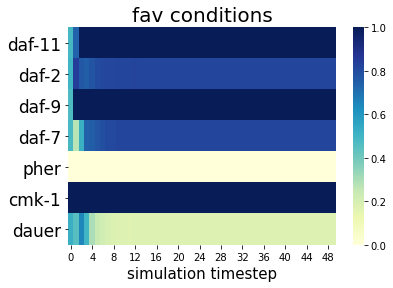

In [8]:
import seaborn as sn
import pandas as pd
from matplotlib import pyplot as plt
data1 = avgs["daf-11"], avgs["daf-2"], avgs["daf-9"], avgs["daf-7"], avgs["pher"], avgs["cmk-1"], avgs["dauer"]
df1 = pd.DataFrame(data1) 
df1.rename(index={0: 'daf-11', 1: 'daf-2', 2: 'daf-9', 3: 'daf-7', 4:'pher', 5: 'cmk-1', 6: 'dauer'}, inplace=True)

#print(df)

g = sn.heatmap(df1,cmap="YlGnBu")
g.set_yticklabels(g.get_yticklabels(), rotation = 0, fontsize = 17, color="black")
g.set_xticklabels(g.get_xticklabels(), rotation = 0, fontsize = 10)
g.set_xlim(0, 50)
g.set_title('fav conditions', fontsize = 20, color="black")
plt.xlabel('simulation timestep', fontsize = 15, color="black") 


In [9]:
text_unf = """
#initial conditions
cmk-1 = ncr = False 
pher = True

#rules
dhs-16 *= daf-2 
daf-9 *= not dhs-16 or ncr or daf-12 
daf-12 *= not daf-9 or not daf-7 
daf-16 *= not akt or daf-12 
pdk-1 *= age-1
age-1 *= aap-1 
aap-1 *= daf-2 
akt *= pdk-1  
daf-2 *= (ins-7 and daf-28) or (not ins-1 or not ins-18) 
dauer *= daf-16 and daf-12  
ins-7 *= daf-7 or not daf-16  
daf-7 *= (tax-4 and cmk-1) and not hsf-1 
daf-11 *= not srbc  
daf-28 *= cmk-1  
daf-5 *= daf-3  
daf-3 *= not daf-8-14 
daf-8-14 *= daf-1-4 
daf-1-4 *= daf-7 
ins-1 *= daf-5 
hsf-1 *= not daf-2 
srbc *= pher 
tax-4 *= daf-11 
ins-18 *= daf-16 
"""

coll = util.Collector()
for i in range(1000):
    sim = Model(mode='async', text=text_unf )
    sim.initialize(missing= util.randbool)
    sim.iterate(steps=100)
    coll.collect( states=sim.states, nodes=sim.nodes )

avgs = coll.get_averages( normalize=True )


In [10]:
print("daf-2", avgs["daf-2"])
print("daf-7", avgs["daf-7"])
print("daf-11", avgs["daf-11"])
print("daf-9", avgs["daf-9"])
print("cmk-1", avgs["cmk-1"])
print("pher", avgs["pher"])
print("dauer", avgs["dauer"])

daf-2 [0.484, 0.763, 0.615, 0.428, 0.222, 0.06, 0.006, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
daf-7 [0.497, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0

Text(0.5, 15.0, 'simulation timestep')

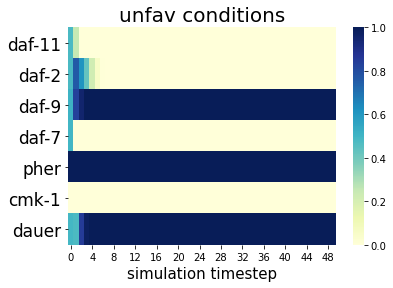

In [12]:
import seaborn as sn
import pandas as pd
from matplotlib import pyplot as plt
data2 = avgs["daf-11"], avgs["daf-2"], avgs["daf-9"], avgs["daf-7"], avgs["pher"], avgs["cmk-1"], avgs["dauer"]
df2 = pd.DataFrame(data2) 
df2.rename(index={0: 'daf-11', 1: 'daf-2', 2: 'daf-9', 3: 'daf-7', 4:'pher', 5: 'cmk-1', 6: 'dauer'}, inplace=True)

#print(df)

g = sn.heatmap(df2,cmap="YlGnBu")
g.set_yticklabels(g.get_yticklabels(), rotation = 0, fontsize = 17, color="black")
g.set_xticklabels(g.get_xticklabels(), rotation = 0, fontsize = 10)
g.set_xlim(0, 50)
g.set_title('unfav conditions', fontsize = 20, color="black")
plt.xlabel('simulation timestep', fontsize = 15, color="black") 

perturbation experiments

In [33]:
on = []
off = ["daf-12"]

text_mut = boolean2.modify_states(text=text_unf, turnon=on, turnoff=off)

coll= util.Collector()

for i in range(1000):
    mut = Model(mode='async', text= text_mut)
    mut.initialize(missing=util.randbool)
    mut.iterate(steps=100)
    coll.collect( states=mut.states, nodes=mut.nodes)
    
avgs_k1 = coll.get_averages( normalize=True )

# print(avgs["daf-16"])
# print(avgs["dauer"])
# print(avgs["pher"])

Text(0.5, 15.0, 'simulation timestep')

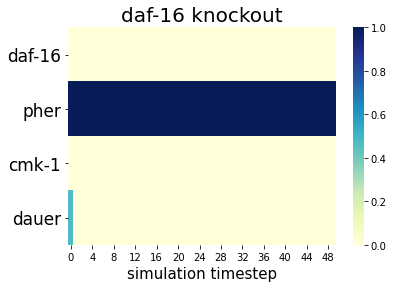

In [29]:
data3 = avgs_k1["daf-16"], avgs_k1["pher"], avgs_k1["cmk-1"], avgs_k1["dauer"]
df3 = pd.DataFrame(data3) 
df3.rename(index={0: 'daf-16', 1:'pher', 2: 'cmk-1', 3: 'dauer'}, inplace=True)

#print(df)

g = sn.heatmap(df3,cmap="YlGnBu")
g.set_yticklabels(g.get_yticklabels(), rotation = 0, fontsize = 17, color="black")
g.set_xticklabels(g.get_xticklabels(), rotation = 0, fontsize = 10)
g.set_xlim(0, 50)
g.set_title('daf-16 knockout', fontsize = 20, color="black")
plt.xlabel('simulation timestep', fontsize = 15, color="black")

Text(0.5, 15.0, 'simulation timestep')

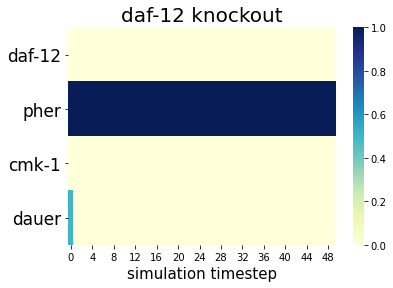

In [34]:
data4 = avgs_k1["daf-12"], avgs_k1["pher"], avgs_k1["cmk-1"], avgs_k1["dauer"]
df4 = pd.DataFrame(data4) 
df4.rename(index={0: 'daf-12', 1:'pher', 2: 'cmk-1', 3: 'dauer'}, inplace=True)

#print(df)

g = sn.heatmap(df4,cmap="YlGnBu")
g.set_yticklabels(g.get_yticklabels(), rotation = 0, fontsize = 17, color="black")
g.set_xticklabels(g.get_xticklabels(), rotation = 0, fontsize = 10)
g.set_xlim(0, 50)
g.set_title('daf-12 knockout', fontsize = 20, color="black")
plt.xlabel('simulation timestep', fontsize = 15, color="black")

Text(0.5, 15.0, 'simulation timestep')

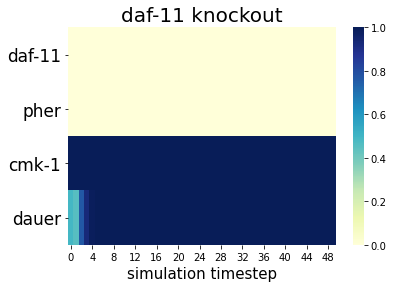

In [36]:
on = []
off = ["daf-11"]

text_mut = boolean2.modify_states(text=text, turnon=on, turnoff=off)

coll= util.Collector()

for i in range(1000):
    mut = Model(mode='async', text= text_mut)
    mut.initialize(missing=util.randbool)
    mut.iterate(steps=100)
    coll.collect( states=mut.states, nodes=mut.nodes)
    
avgs_k2 = coll.get_averages( normalize=True )

data4 = avgs_k2["daf-11"], avgs_k2["pher"], avgs_k2["cmk-1"], avgs_k2["dauer"]
df4 = pd.DataFrame(data4) 
df4.rename(index={0: 'daf-11', 1:'pher', 2: 'cmk-1', 3: 'dauer'}, inplace=True)

#print(df)

g = sn.heatmap(df4,cmap="YlGnBu")
g.set_yticklabels(g.get_yticklabels(), rotation = 0, fontsize = 17, color="black")
g.set_xticklabels(g.get_xticklabels(), rotation = 0, fontsize = 10)
g.set_xlim(0, 50)
g.set_title('daf-11 knockout', fontsize = 20, color="black")
plt.xlabel('simulation timestep', fontsize = 15, color="black")

Text(0.5, 15.0, 'simulation timestep')

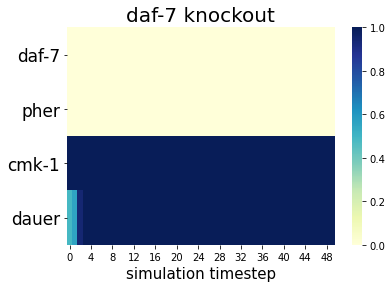

In [37]:
on = []
off = ["daf-7"]

text_mut = boolean2.modify_states(text=text, turnon=on, turnoff=off)

coll= util.Collector()

for i in range(1000):
    mut = Model(mode='async', text= text_mut)
    mut.initialize(missing=util.randbool)
    mut.iterate(steps=100)
    coll.collect( states=mut.states, nodes=mut.nodes)
    
avgs_k3 = coll.get_averages( normalize=True )

data4 = avgs_k3["daf-7"], avgs_k3["pher"], avgs_k3["cmk-1"], avgs_k3["dauer"]
df4 = pd.DataFrame(data4) 
df4.rename(index={0: 'daf-7', 1:'pher', 2: 'cmk-1', 3: 'dauer'}, inplace=True)

#print(df)

g = sn.heatmap(df4,cmap="YlGnBu")
g.set_yticklabels(g.get_yticklabels(), rotation = 0, fontsize = 17, color="black")
g.set_xticklabels(g.get_xticklabels(), rotation = 0, fontsize = 10)
g.set_xlim(0, 50)
g.set_title('daf-7 knockout', fontsize = 20, color="black")
plt.xlabel('simulation timestep', fontsize = 15, color="black")

Text(0.5, 15.0, 'simulation timestep')

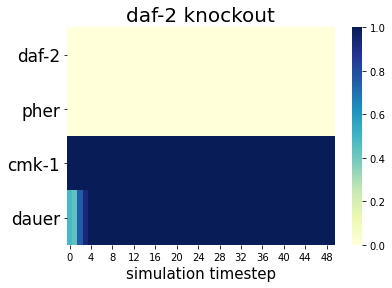

In [38]:
on = []
off = ["daf-2"]

text_mut = boolean2.modify_states(text=text, turnon=on, turnoff=off)

coll= util.Collector()

for i in range(1000):
    mut = Model(mode='async', text= text_mut)
    mut.initialize(missing=util.randbool)
    mut.iterate(steps=100)
    coll.collect( states=mut.states, nodes=mut.nodes)
    
avgs_k4 = coll.get_averages( normalize=True )

data4 = avgs_k4["daf-2"], avgs_k4["pher"], avgs_k4["cmk-1"], avgs_k4["dauer"]
df4 = pd.DataFrame(data4) 
df4.rename(index={0: 'daf-2', 1:'pher', 2: 'cmk-1', 3: 'dauer'}, inplace=True)

#print(df)

g = sn.heatmap(df4,cmap="YlGnBu")
g.set_yticklabels(g.get_yticklabels(), rotation = 0, fontsize = 17, color="black")
g.set_xticklabels(g.get_xticklabels(), rotation = 0, fontsize = 10)
g.set_xlim(0, 50)
g.set_title('daf-2 knockout', fontsize = 20, color="black")
plt.xlabel('simulation timestep', fontsize = 15, color="black")

Text(0.5, 15.0, 'simulation timestep')

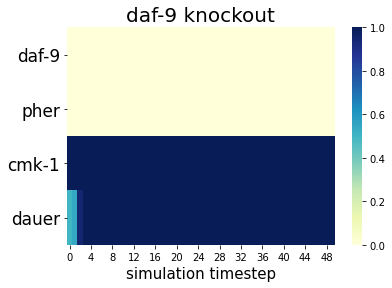

In [39]:
on = []
off = ["daf-9"]

text_mut = boolean2.modify_states(text=text, turnon=on, turnoff=off)

coll= util.Collector()

for i in range(1000):
    mut = Model(mode='async', text= text_mut)
    mut.initialize(missing=util.randbool)
    mut.iterate(steps=100)
    coll.collect( states=mut.states, nodes=mut.nodes)
    
avgs_k5 = coll.get_averages( normalize=True )

data4 = avgs_k5["daf-9"], avgs_k5["pher"], avgs_k5["cmk-1"], avgs_k5["dauer"]
df4 = pd.DataFrame(data4) 
df4.rename(index={0: 'daf-9', 1:'pher', 2: 'cmk-1', 3: 'dauer'}, inplace=True)

#print(df)

g = sn.heatmap(df4,cmap="YlGnBu")
g.set_yticklabels(g.get_yticklabels(), rotation = 0, fontsize = 17, color="black")
g.set_xticklabels(g.get_xticklabels(), rotation = 0, fontsize = 10)
g.set_xlim(0, 50)
g.set_title('daf-9 knockout', fontsize = 20, color="black")
plt.xlabel('simulation timestep', fontsize = 15, color="black")

Text(0.5, 8.96, 'simulation timestep')

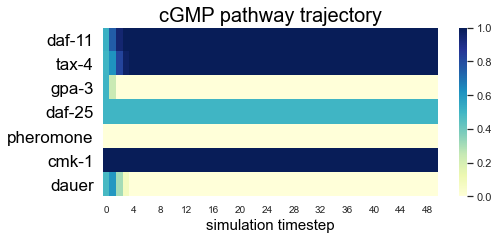

In [163]:
import seaborn as sn
data1 = avgs["daf-11"], avgs["tax-4"], avgs["gpa-3"], avgs["daf-25"], avgs["pheromone"], avgs["cmk-1"], avgs["dauer"]
df1 = pd.DataFrame(data1) 
df1.rename(index={0: 'daf-11', 1: 'tax-4', 2: 'gpa-3', 3: 'daf-25', 4:'pheromone', 5: 'cmk-1', 6: 'dauer'}, inplace=True)

#print(df)

g = sn.heatmap(df1,cmap="YlGnBu")
g.set_yticklabels(g.get_yticklabels(), rotation = 0, fontsize = 17, color="black")
g.set_xticklabels(g.get_xticklabels(), rotation = 0, fontsize = 10)
g.set_xlim(0, 50)
g.set_title('cGMP pathway trajectory', fontsize = 20, color="black")
plt.xlabel('simulation timestep', fontsize = 15, color="black")


Text(0.5, 8.96, 'simulation timestep')

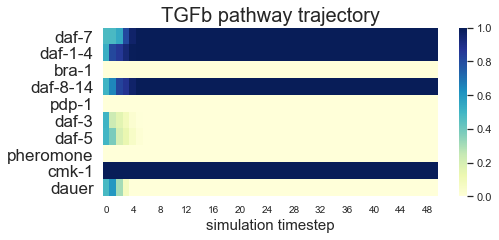

In [146]:
data2 = avgs["daf-7"], avgs["daf-1-4"], avgs["bra-1"], avgs["daf-8-14"], avgs["pdp-1"], avgs["daf-3"], avgs["daf-5"], avgs["pheromone"], avgs["cmk-1"], avgs["dauer"]
df2 = pd.DataFrame(data2)
df2.rename(index={0: 'daf-7', 1: 'daf-1-4', 2:'bra-1', 3:'daf-8-14', 4:'pdp-1', 5:'daf-3', 6:'daf-5', 7:'pheromone', 8:'cmk-1', 9:'dauer'}, inplace=True)

h = sn.heatmap(df2, cmap="YlGnBu")
h.set_yticklabels(h.get_yticklabels(), rotation = 0, fontsize = 17)
h.set_xticklabels(h.get_xticklabels(), rotation = 0, fontsize = 10)
h.set_xlim(0, 50)
h.set_title('TGFb pathway trajectory', fontsize = 20)
plt.xlabel('simulation timestep', fontsize = 15)

Text(0.5, 8.96, 'simulation timestep')

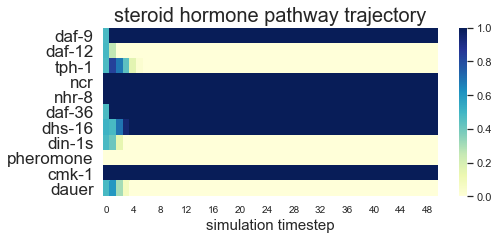

In [162]:
data3 = avgs["daf-9"], avgs["daf-12"], avgs["tph-1"], avgs["ncr"], avgs["nhr-8"], avgs["daf-36"], avgs["dhs-16"], avgs["din-1s"], avgs["pheromone"], avgs["cmk-1"], avgs["dauer"]
df3 = pd.DataFrame(data3)
df3.rename(index={0:'daf-9', 1: 'daf-12', 2: 'tph-1', 3:'ncr', 4:'nhr-8', 5:'daf-36', 6:'dhs-16', 7:'din-1s', 8:'pheromone', 9:'cmk-1', 10:'dauer'}, inplace=True)

i = sn.heatmap(df3, cmap="YlGnBu")
i.set_yticklabels(i.get_yticklabels(), rotation = 0, fontsize = 17)
i.set_xticklabels(i.get_xticklabels(), rotation = 0, fontsize = 10)
i.set_xlim(0, 50)
i.set_title('steroid hormone pathway trajectory', fontsize = 20)
plt.xlabel('simulation timestep', fontsize = 15)



Text(0.5, 8.96, 'simulation timestep')

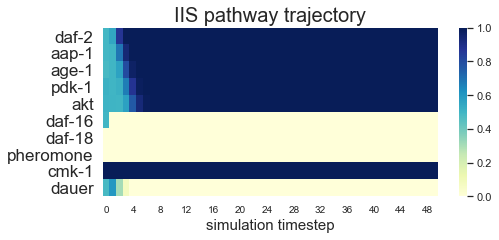

In [148]:
data4 = avgs["daf-2"], avgs["aap-1"], avgs["age-1"], avgs["pdk-1"], avgs["akt"], avgs["daf-16"], avgs["daf-18"], avgs["pheromone"], avgs["cmk-1"], avgs["dauer"]
df4 = pd.DataFrame(data4)
df4.rename(index={0:'daf-2', 1: 'aap-1', 2: 'age-1', 3:'pdk-1', 4:'akt', 5:'daf-16', 6:'daf-18', 7:'pheromone', 8:'cmk-1', 9:'dauer'}, inplace=True)

j = sn.heatmap(df4, cmap="YlGnBu")
j.set_yticklabels(j.get_yticklabels(), rotation = 0, fontsize = 17)
j.set_xticklabels(j.get_xticklabels(), rotation = 0, fontsize = 10)
j.set_xlim(0, 50)
j.set_title('IIS pathway trajectory', fontsize = 20)
plt.xlabel('simulation timestep', fontsize = 15)



Text(0.5, 8.96, 'simulation timestep')

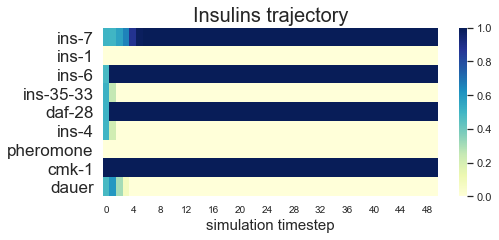

In [151]:
data5 = avgs["ins-7"], avgs["ins-1"], avgs["ins-6"], avgs["ins-35-33"], avgs["daf-28"], avgs["ins-4"], avgs["pheromone"], avgs["cmk-1"], avgs["dauer"]
df5 = pd.DataFrame(data5)
df5.rename(index={0:'ins-7', 1: 'ins-1', 2: 'ins-6', 3:'ins-35-33', 4:'daf-28', 5:'ins-4', 6:'pheromone', 7:'cmk-1', 8:'dauer'}, inplace=True)

k = sn.heatmap(df5, cmap="YlGnBu")
k.set_yticklabels(k.get_yticklabels(), rotation = 0, fontsize = 17)
k.set_xticklabels(k.get_xticklabels(), rotation = 0, fontsize = 10)
k.set_xlim(0, 50)
k.set_title('Insulins trajectory', fontsize = 20)
plt.xlabel('simulation timestep', fontsize = 15)


<Figure size 1800x1800 with 0 Axes>

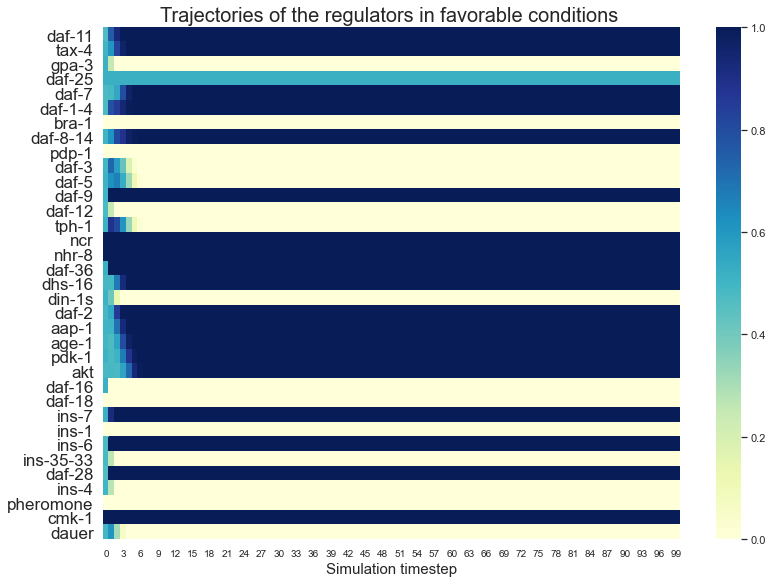

<Figure size 1800x1800 with 0 Axes>

In [181]:
from matplotlib import rcParams
d = avgs["daf-11"], avgs["tax-4"], avgs["gpa-3"], avgs["daf-25"], avgs["daf-7"], avgs["daf-1-4"], avgs["bra-1"], avgs["daf-8-14"], avgs["pdp-1"], avgs["daf-3"], avgs["daf-5"], avgs["daf-9"], avgs["daf-12"], avgs["tph-1"], avgs["ncr"], avgs["nhr-8"], avgs["daf-36"], avgs["dhs-16"], avgs["din-1s"],avgs["daf-2"], avgs["aap-1"], avgs["age-1"], avgs["pdk-1"], avgs["akt"], avgs["daf-16"], avgs["daf-18"],avgs["ins-7"], avgs["ins-1"], avgs["ins-6"], avgs["ins-35-33"], avgs["daf-28"], avgs["ins-4"], avgs["pheromone"], avgs["cmk-1"], avgs["dauer"] 
dff = pd.DataFrame(d)
dff.rename(index={0: 'daf-11', 1: 'tax-4', 2: 'gpa-3', 3: 'daf-25',4: 'daf-7', 5: 'daf-1-4', 6:'bra-1', 7:'daf-8-14', 8:'pdp-1', 9:'daf-3', 10:'daf-5',11:'daf-9', 12: 'daf-12', 13: 'tph-1', 14:'ncr', 15:'nhr-8', 16:'daf-36', 17:'dhs-16', 18:'din-1s',19:'daf-2', 20: 'aap-1', 21: 'age-1', 22:'pdk-1', 23:'akt', 24:'daf-16', 25:'daf-18',26:'ins-7', 27: 'ins-1', 28: 'ins-6', 29:'ins-35-33', 30:'daf-28', 31:'ins-4', 32:'pheromone', 33:'cmk-1', 34:'dauer'}, inplace=True)

mm = sn.heatmap(dff, cmap="YlGnBu")
mm.set_yticklabels(mm.get_yticklabels(), rotation = 0, fontsize = 17)
mm.set_xticklabels(mm.get_xticklabels(), rotation = 0, fontsize = 10)
mm.set_xlim(0, 100)
mm.set_title('Trajectories of the regulators in favorable conditions ', fontsize = 20)
# rcParams['figure.figsize'] = 11.7,8.27
plt.xlabel('Simulation timestep', fontsize = 15)
plt.figure(figsize=(25,25))


In [196]:
off = ["daf-16"]
on=[]

mod = boolean2.modify_states(text=text_o, turnon=on, turnoff=off)

for i in range(100):
    sim1 = Model(mode='async', text=mod )
    sim1.initialize(missing= util.randbool)
    sim1.iterate(steps=100)
    coll.collect( states=sim1.states, nodes=sim1.nodes )

avgs = coll.get_averages( normalize=True )

print(avgs["daf-11"])
print(avgs["daf-7"])
print(avgs["daf-16"])
print(avgs["dauer"])

[0.525, 0.635, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55]
[0.51, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

In [195]:
on = []
off = ["daf-16"]

text_mut = boolean2.modify_states(text=text_o, turnon=on, turnoff=off)
mut = Model(mode='async', text = text_mut)

coll= util.Collector()
for i in range(100):
    mut = Model(mode='async', text= text_mut)
    mut.initialize(missing=util.randbool)
    mut.iterate(steps=100)
    coll.collect( states=mut.states, nodes=mut.nodes)
    
avgs = coll.get_averages( normalize=True )

print(avgs["daf-11"])
print(avgs["daf-7"])
print(avgs["daf-16"])
print(avgs["dauer"])

[0.58, 0.63, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54]
[0.41, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0

TypeError: __init__() got an unexpected keyword argument 'location'

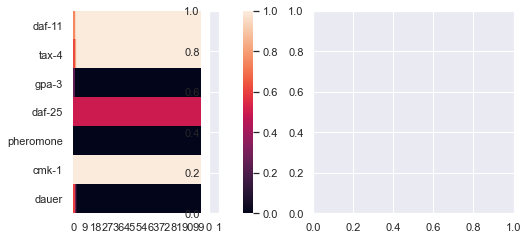

In [140]:

# plt.rcParams["figure.figsize"] = [7.50, 3.50]
# plt.rcParams["figure.autolayout"] = True
# fig, (ax1, ax2) = plt.subplots(ncols=2)
# fig.subplots_adjust(wspace=1)
# sns.heatmap(df3, cmap="YlGnBu", ax=ax1, cbar=False)
# sns.heatmap(df4, cmap="YlGnBu", ax=ax2, cbar=False)



# fig.subplots_adjust(wspace=0.5)
# plt.show()

fig, (ax,ax2) = plt.subplots(ncols=2)
fig.subplots_adjust(wspace=0.5)
sns.heatmap(df1, cmap="rocket", ax=ax)
fig.colorbar(ax.collections[0], ax=ax,location="left")
sns.heatmap(df2, cmap="icefire", ax=ax2)
fig.colorbar(ax2.collections[0], ax=ax2,location="right")
ax2.yaxis.tick_right()
ax2.tick_params(rotation=0)
plt.show()

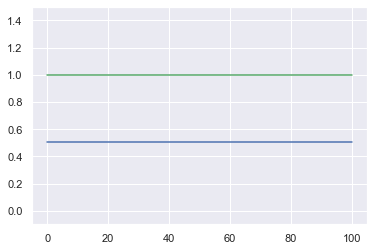

In [64]:
# daf11 = pylab.plot(avgs["daf-11"], 'r-')
# tax4 = pylab.plot(avgs["tax-4"], 'g-')
# gpa3 = pylab.plot(avgs["gpa-3"], 'b-')
daf25 = pylab.plot(avgs["daf-25"], 'b-')
#pher = pylab.plot(avgs["pheromone"], 'p-')
cmk1 = pylab.plot(avgs["cmk-1"], 'g-')
pylab.ylim((-0.1, 1.5))


pylab.show()

In [63]:
import seaborn as sns
import pandas as pd
import numpy as np

df = pd.read_csv("/Users/alekhyakandoor/Desktop/booleannet/booleannet-master/examples/dauer/data.csv")
print(df.head())
sns.heatmap(df)
# daf2 = avgs["daf-2"]
# daf11 = avgs["daf-11"]
# values = np.array[daf2, daf11]
# nodes = ['daf-2','daf-11']
# plt.imshow(values, cmap='blue')

   daf-7    daf-2      
0  1        1          
1  1        2          
2  1        3          


ValueError: could not convert string to float: '1        1          '

In [47]:
import numpy as np
data = [['daf-2', avgs["daf-2"]], ['daf-7',avgs["daf-7"]]]
print(data)
print(data.head())


[['daf-2', [0.493, 0.551, 0.873, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]], ['daf-7', [0.48, 0.482, 0.546, 0.81, 0.964, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1

AttributeError: 'list' object has no attribute 'head'

daf-7 [0.53, 0.51, 0.52, 0.79, 0.95, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
tax-4 [0.54, 0.71, 0.89, 0.98, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.

<function matplotlib.pyplot.show(close=None, block=None)>

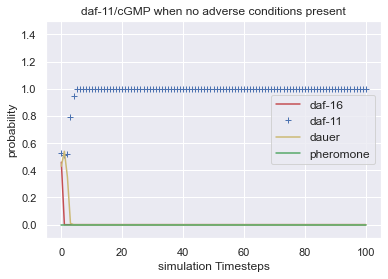

In [17]:
daf16 = pylab.plot(avgs["daf-16"], 'r-')
daf2 = pylab.plot(avgs["daf-7"], 'b+')
dauer = pylab.plot(avgs["dauer"], 'y-')
pher = pylab.plot(avgs["pheromone"], 'g-')
pylab.xlabel('simulation Timesteps')
pylab.ylabel('probability')
pylab.title('daf-11/cGMP when no adverse conditions present')
pylab.ylim((-0.1, 1.5))
print("daf-7", avgs["daf-7"])
print("tax-4", avgs["tax-4"])
print("cmk-1", avgs["cmk-1"])
print("hsf-1", avgs["hsf-1"])
pylab.legend(('daf-16','daf-11','dauer','pheromone'), loc='best', prop={'size': 12})
pylab.show

<function matplotlib.pyplot.show(close=None, block=None)>

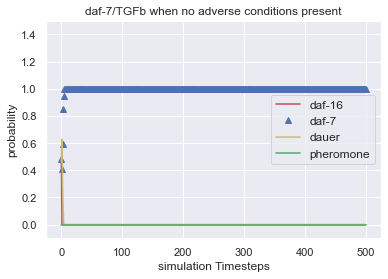

In [31]:
daf16 = pylab.plot(avgs["daf-16"], 'r-')
daf11 = pylab.plot(avgs["daf-7"], 'b^')
dauer = pylab.plot(avgs["dauer"], 'y-')
pher = pylab.plot(avgs["pheromone"], 'g-')
pylab.xlabel('simulation Timesteps')
pylab.ylabel('probability')
pylab.title('daf-7/TGFb when no adverse conditions present')
pylab.ylim((-0.1, 1.5))

pylab.legend(('daf-16','daf-7','dauer','pheromone'), loc='best', prop={'size': 12})
pylab.show

<function matplotlib.pyplot.show(close=None, block=None)>

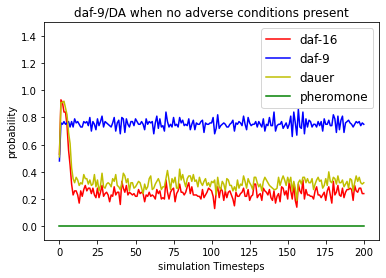

In [44]:
daf16 = pylab.plot(avgs["daf-16"], 'r-')
daf11 = pylab.plot(avgs["daf-9"], 'b-')
dauer = pylab.plot(avgs["dauer"], 'y-')
pher = pylab.plot(avgs["pheromone"], 'g-')
pylab.xlabel('simulation Timesteps')
pylab.ylabel('probability')
pylab.title('daf-9/DA when no adverse conditions present')
pylab.ylim((-0.1, 1.5))

pylab.legend(('daf-16','daf-9','dauer','pheromone'), loc='best', prop={'size': 12})
pylab.show

<function matplotlib.pyplot.show(close=None, block=None)>

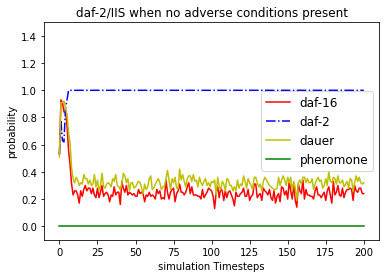

In [45]:
daf16 = pylab.plot(avgs["daf-16"], 'r-')
daf11 = pylab.plot(avgs["daf-2"], 'b-.')
dauer = pylab.plot(avgs["dauer"], 'y-')
pher = pylab.plot(avgs["pheromone"], 'g-')
pylab.xlabel('simulation Timesteps')
pylab.ylabel('probability')
pylab.title('daf-2/IIS when no adverse conditions present')
pylab.ylim((-0.1, 1.5))

pylab.legend(('daf-16','daf-2','dauer','pheromone'), loc='best', prop={'size': 12})
pylab.show

In [54]:
import pylab
import boolean2
from boolean2 import state, network, util, Model
text = """
#initial values for dauer
pheromone = daf-18 = bra-1 = True
nhr-8 = cmk-1 = False
dhs-16 = False

aap-1 *= daf-2
age-1 *= aap-1 and not daf-18
akt *= pdk-1
daf-11 *= daf-25 or (not srbc and not gpa-3)
daf-2 *= ins-7 or not ins-18
daf-12 *= not daf-9
daf-21 *= daf-21 or daf-2
daf-3 *= (not daf-8-14) or not daf-7
daf-36 *= nhr-8
daf-4 *= daf-7 and daf-21
daf-5 *= daf-3
din-1s *= daf-12
pdk-1 *= age-1
tax-4 *= daf-11 or daf-7
ins-7 *= daf-7 or not daf-16
ins-18 *= daf-16
daf-8-14 *= daf-1 
daf-9 *= daf-12 or (not dhs-16 and not daf-36) or ncr 
daf-7 *= (daf-11 and tax-4 and cmk-1) and not pheromone
daf-28 *= daf-7 and daf-11 or cmk-1
daf-16 *= daf-12 or not daf-28 or daf-5 or not akt or daf-18
daf-1 *= (daf-4 and daf-7 and daf-21) and not bra-1
dauer *= daf-16 or din-1s
srbc *= pheromone
tph-1 *= daf-3 or dauer
gpa-3 *= srbc
str-2 *= daf-7 and not pheromone
daf-15 *= not daf-16
"""

coll = util.Collector()
for i in range(100):
    sim = Model(mode='async', text=text )
    sim.initialize(missing= util.randbool)
    sim.iterate(steps=200)
    coll.collect( states=sim.states, nodes=sim.nodes )

avgs = coll.get_averages( normalize=True )


<function matplotlib.pyplot.show(close=None, block=None)>

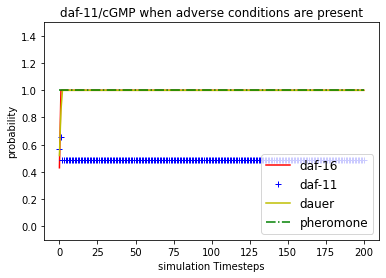

In [47]:
daf16 = pylab.plot(avgs["daf-16"], 'r-')
daf11 = pylab.plot(avgs["daf-11"], 'b+')
dauer = pylab.plot(avgs["dauer"], 'y-')
pher = pylab.plot(avgs["pheromone"], 'g-.')
pylab.xlabel('simulation Timesteps')
pylab.ylabel('probability')
pylab.title('daf-11/cGMP when adverse conditions are present')
pylab.ylim((-0.1, 1.5))

pylab.legend(('daf-16','daf-11','dauer','pheromone'), loc='best', prop={'size': 12})
pylab.show

<function matplotlib.pyplot.show(close=None, block=None)>

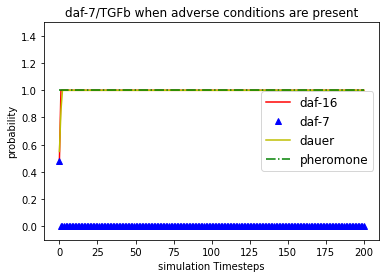

In [55]:
daf16 = pylab.plot(avgs["daf-16"], 'r-')
daf11 = pylab.plot(avgs["daf-7"], 'b^')
dauer = pylab.plot(avgs["dauer"], 'y-')
pher = pylab.plot(avgs["pheromone"], 'g-.')
pylab.xlabel('simulation Timesteps')
pylab.ylabel('probability')
pylab.title('daf-7/TGFb when adverse conditions are present')
pylab.ylim((-0.1, 1.5))

pylab.legend(('daf-16','daf-7','dauer','pheromone'), loc='best', prop={'size': 12})
pylab.show

<function matplotlib.pyplot.show(close=None, block=None)>

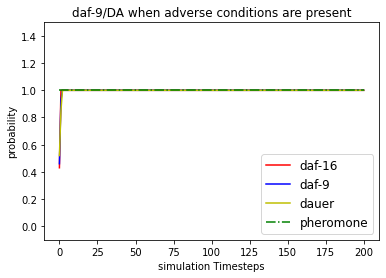

In [49]:
daf16 = pylab.plot(avgs["daf-16"], 'r-')
daf11 = pylab.plot(avgs["daf-9"], 'b-')
dauer = pylab.plot(avgs["dauer"], 'y-')
pher = pylab.plot(avgs["pheromone"], 'g-.')
pylab.xlabel('simulation Timesteps')
pylab.ylabel('probability')
pylab.title('daf-9/DA when adverse conditions are present')
pylab.ylim((-0.1, 1.5))

pylab.legend(('daf-16','daf-9','dauer','pheromone'), loc='best', prop={'size': 12})
pylab.show

<function matplotlib.pyplot.show(close=None, block=None)>

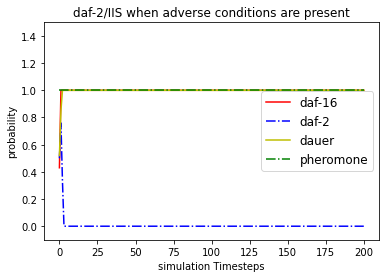

In [50]:
daf16 = pylab.plot(avgs["daf-16"], 'r-')
daf11 = pylab.plot(avgs["daf-2"], 'b-.')
dauer = pylab.plot(avgs["dauer"], 'y-')
pher = pylab.plot(avgs["pheromone"], 'g-.')
pylab.xlabel('simulation Timesteps')
pylab.ylabel('probability')
pylab.title('daf-2/IIS when adverse conditions are present')
pylab.ylim((-0.1, 1.5))

pylab.legend(('daf-16','daf-2','dauer','pheromone'), loc='best', prop={'size': 12})
pylab.show

In [45]:
import pylab
import boolean2
from boolean2 import state, network, util, Model
text = """
#initial values 
#daf-18 = daf-12 = daf-3 = daf-5 = din-1s = sod-3 = tph-1 = ins-18 = daf-16 = pheromone = srbc = True
dauer = False
#daf-16 = False
#updating rules

aap-1 *= daf-2
age-1 *= aap-1 and daf-18
akt *= pdk-1
daf-11 *= (not srbc and not gpa-3) and daf-25
daf-2 *= ins-7 and not ins-18
daf-12 *= not daf-9
daf-21 *= daf-21 or daf-2
daf-3 *= (not daf-8-14)
daf-36 *= nhr-8
daf-4 *= daf-7 and daf-21
daf-5 *= daf-3
din-1s *= daf-12
pdk-1 *= age-1
tax-4 *= cgmp 
ins-7 *= daf-7 and not daf-16
ins-18 *= daf-16
daf-8-14 *= daf-1 
daf-9 *= daf-12 or (not dhs-16 and not daf-36) or ncr 
daf-7 *= daf-11 or tax-4 or not pheromone or not gpa-3
daf-28 *= daf-7 and daf-11 and not daf-16
daf-16 *= (daf-12 or daf-18 or daf-28 or daf-5) or (not ins-7 or not akt)
daf-1 *= (daf-4 and daf-7 and daf-21) or not bra-1
dauer *= daf-16 or din-1s
srbc *= pheromone
"""

coll = util.Collector()
for i in range(10):
    sim = Model(mode='async', text=text)
    sim.initialize(missing= util.randbool)
    sim.iterate(steps=70)
    coll.collect( states=sim.states, nodes=sim.nodes )

avgs = coll.get_averages( normalize=True )

daf-16 = pylab.plot(avgs["daf-16"], 'ob-')
daf-12 = pylab.plot(avgs["daf-12"], 'p-')
daf-18 = pylab.plot(avgs["daf-18"], 'c-')
daf-28 = pylab.plot(avgs["daf-28"], 'k-')
dauer = pylab.plot(avgs["dauer"], 'r.')
pher = pylab.plot(avgs["pheromone"], '^g-')
pylab.ylim((-0.1, 1.1))
pylab.show

SyntaxError: cannot assign to operator (<ipython-input-45-39e22abba486>, line 57)

In [87]:
aap-1=False, age-1=False, akt=False, bra-1=True, cgmp=False, cmk-1=True, daf-1=False, daf-11=False, daf-12=False, daf-14=False, daf-15=False, daf-16=True, daf-18=False, daf-2=False, daf-21=False, daf-22=True, daf-25=False, daf-28=False, daf-3=True, daf-36=True, daf-37=True, daf-4=False, daf-5=True, daf-7=True, daf-8=False, daf-9=True, dauer=True, dhs-16=False, din-1s=False, egl-30=True, ftt-2=True, goa-1=True, gpa-3=False, hlh-30=False, hsd-1=False, ifta-2=True, ins-1=False, ins-18=True, ins-7=False, ist-1=False, kin-8=False, ncr=True, nhr-8=True, odr-3=False, par-5=False, pde=False, pdk-1=False, pdp-1=True, pheromone=True, rle-1=False, sod-3=True, srbc=True, str-2=False, str-3=False, swi-snf=True, tax-2=True, tax-4=False, tph-1=False

SyntaxError: invalid syntax (<ipython-input-87-a740edac37d1>, line 1)

In [30]:
text = """
A = True

A *= B
B *= C
"""


In [43]:
import boolean2
from boolean2 import Model, util
from random import choice

#TARGETS = set( "pheromone dauer".split() )
def new_getvalue( state, name, p):
    """
    Called every time a node value is used in an expression. 
    It will override the value for the current step only.
    Returns random values for the node states
    """
    global TARGETS
    value = util.default_get_value( state, name, p ) 

    if name in TARGETS:
        # pick at random from True, False and original value
        return choice( [True, False, value] )
    else:
        return value 
    
def run( text, nodes, repeat, steps ):
    """
    Runs the simulation and collects the nodes into a collector, 
    a convenience class that can average the values that it collects.
    """
    coll = util.Collector()
    
    for i in range( repeat ):
        engine  = Model( mode='async', text=text )
        engine.RULE_GETVALUE = new_getvalue
        #print("new_getvalue", new_getvalue)
        # minimalist initial conditions, missing nodes set to false
        engine.initialize( missing=util.false )
        engine.iterate( steps=steps)
        coll.collect( states=engine.states, nodes=nodes )

    print('- completed')
    avgs = coll.get_averages( normalize=True )
    return avgs

if __name__ == '__main__':

    # read in the text
    #text = file( 'LGL.txt').read()

    # the nodes of interest that are collected over the run
    # NODES  = 'Apoptosis STAT3 FasL Ras'.split()
    
    # this collects the state of all nodes 
    NODES  = boolean2.all_nodes( text )

    #
    # raise this for better curves (will take about 2 seconds per repeat)
    # plots were made for REPEAT = 1000, STEPS=150
    #
    REPEAT = 15
    STEPS  = 10

    data = []
    
    print('- starting simulation with REPEAT=%s, STEPS=%s' % (REPEAT, STEPS))

    # a single overexpressed node
    #mtext = boolean2.modify_states( text=text, turnon=['Stimuli'] )
    avgs = run( text=text, repeat=REPEAT, nodes=NODES, steps=STEPS) 
    data.append( avgs )
    
#print(data.detect_cycles())
    
    #a = avgs["daf-"]
    #b = avgs["dauer"]
    
    #print("a is", a)
    #print("b is", b)
    #print(avgs["A"], avgs["B"], avgs["C"])
    #fname = 'd1-run.bin'
    #util.bsave( data, fname=fname )
    #print('- data saved into %s' % fname)
    #print("dauer ---",avgs["dauer"])
    #print("pheromone is ----", avgs["pheromone"])
    


- starting simulation with REPEAT=15, STEPS=10
- completed


In [47]:
avgs.report_cycles()

AttributeError: 'dict' object has no attribute 'report_cycles'

In [36]:
text="""

A *= B
B *= C
C *= A
""" 
eng = Model(text=text, mode='async')
eng.initialize( missing=util.false )
eng.iterate( steps=10)
for state in eng.states:
    print(state.A, state.B, state.C)
    
print(eng.detect_cycles())

False False False
False False False
False False False
False False False
False False False
False False False
False False False
False False False
False False False
False False False
False False False
(0, 1)


<ipython-input-30-5cc3d3fd8388>:5: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x7fc456e92670>] instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  pylab.legend( [p1, p2], ["a", "b"])
<ipython-input-30-5cc3d3fd8388>:5: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x7fc458552130>] instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  pylab.legend( [p1, p2], ["a", "b"])


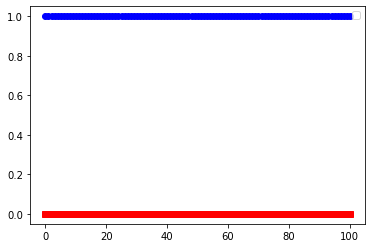

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [30]:
import pylab

p1 = pylab.plot(a, 'sr-')
p2 = pylab.plot(b, 'ob-')
pylab.legend( [p1, p2], ["a", "b"])

pylab.show()
#print(avgs["dauer"])

In [15]:
from boolean2 import Model, util

model = Model( text=text, mode ='async')
model.initialize(missing = util.false )
model.iterate (steps = 10)

for state in model.states:
    print(state.dauer)

False
False
True
True
True
True
True
True
True
True
True


In [16]:
model.report_cycles()
print(model.detect_cycles())

Steady state starting at index 2 -> State: aap-1=False, age-1=False, akt=False, bra-1=False, cgmp=False, cmk-1=False, daf-1=True, daf-11=False, daf-12=False, daf-14=False, daf-15=False, daf-16=True, daf-18=False, daf-2=False, daf-21=False, daf-22=False, daf-25=False, daf-28=False, daf-3=True, daf-36=False, daf-37=False, daf-4=False, daf-5=True, daf-7=True, daf-8=False, daf-9=True, dauer=True, dhs-16=False, din-1s=False, egl-30=False, ftt-2=False, goa-1=False, gpa-3=False, hlh-30=False, hsd-1=False, ifta-2=False, ins-1=False, ins-18=True, ins-7=False, ist-1=False, kin-8=False, ncr=False, nhr-8=False, odr-3=True, par-5=False, pde=False, pdk-1=False, pdp-1=False, pheromone=False, rle-1=False, sod-3=True, srbc=False, str-2=True, str-3=True, swi-snf=False, tax-2=False, tax-4=False, tph-1=False
(2, 1)


In [25]:
coll = util.Collector()

for i in range(3):
    model = Model (text=text, mode='async')
    model.initialize(missing = util.false )
    model.iterate(steps = 5)
    
    nodes = model.nodes
    coll.collect(states=model.states, nodes=nodes)
    
avgs = coll.get_averages(normalize = True)
print (avgs)

{'daf-25': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'daf-9': [0.0, 1.0, 1.0, 1.0, 1.0, 1.0], 'srbc': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'daf-3': [0.0, 1.0, 1.0, 1.0, 1.0, 1.0], 'dhs-16': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'daf-15': [0.0, 0.6666666666666666, 0.0, 0.0, 0.0, 0.0], 'ncr': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'age-1': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'ins-1': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'daf-22': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'pdk-1': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'ins-18': [0.0, 0.3333333333333333, 1.0, 1.0, 1.0, 1.0], 'pdp-1': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'hsd-1': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'daf-12': [0.0, 0.6666666666666666, 0.0, 0.0, 0.0, 0.0], 'aap-1': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'pde': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'goa-1': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'gpa-3': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'swi-snf': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'daf-4': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'dauer': [0.0, 0.6666666666666666, 1.0, 1.0, 1.0, 1.0], 'hlh-30': [0.0, 0.0, 0.0, 0.0, 0.0

<ipython-input-27-705e5cfffbdb>:7: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x7fcd9010b5e0>] instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  pylab.legend( [p1,p2], ["dauer","pheromone"])
<ipython-input-27-705e5cfffbdb>:7: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x7fcd9010b940>] instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  pylab.legend( [p1,p2], ["dauer","pheromone"])


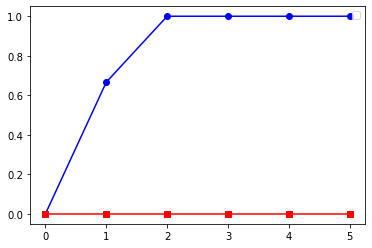

[0.0, 0.6666666666666666, 1.0, 1.0, 1.0, 1.0]


In [27]:
import pylab
val1 = avgs["dauer"]
val2 = avgs["pheromone"]

p1 = pylab.plot(val1, 'ob-')
p2 = pylab.plot(val2, 'sr-')
pylab.legend( [p1,p2], ["dauer","pheromone"])

pylab.show()
print(avgs["dauer"])

In [2]:
model = Model( text=text, mode='async')

# generates all states, set limit to a value to keep only the first that many states
# when limit is a number it will take the first that many initial states
initializer = state.all_initial_states( model.nodes, limit=None )

# the data is the inital data, the func is the initializer
for data, initfunc in initializer:
    # shows the initial values
    print(data)
    model.initialize(missing=initfunc)
    model.iterate(5)

NameError: name 'Model' is not defined